In [1]:
import pandas as pd 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,20]
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.cluster import DBSCAN
import seaborn as sns

In [2]:
data = pd.read_csv('clustering_R3.csv')

Porównanie metod klasteryzacji
====
Do porównania użyję sugerowanych metryk:

- Współczynnik Silhouette
- Indeks Calińskiego-Harabasza
- Indeks Daviesa–Bouldina

Porównywanymi algorytmami będą dwie metody klasteyzacji pochodzące z pakietu sklearn:

- DBSCAN
- Spectral clustering

Zadanie należało by rozpocząć od wizualizacji niesklasteryzowanych danych:


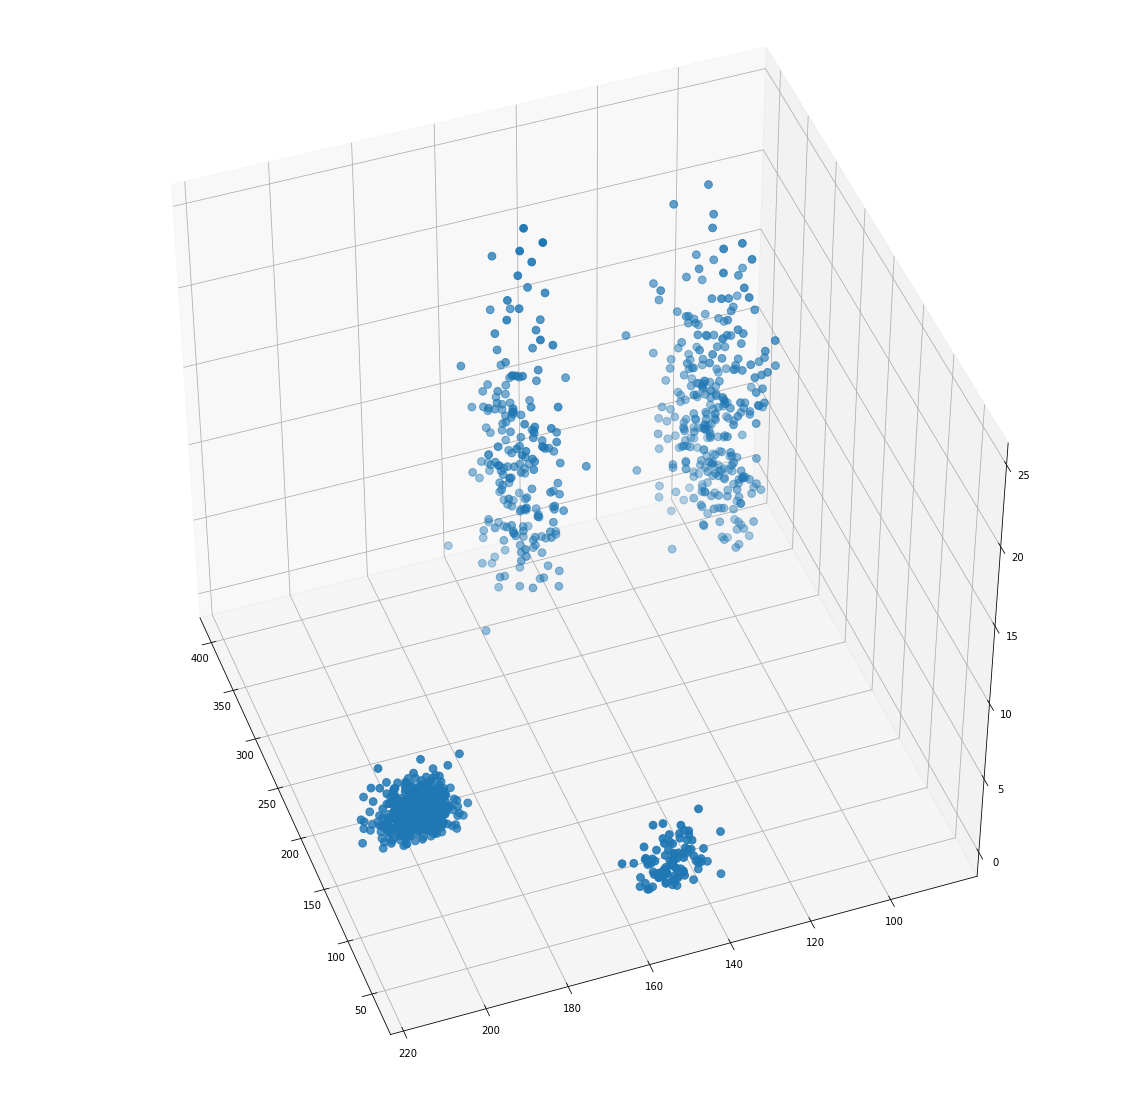

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['X3'], s=60)
ax.view_init(45, 160)
plt.show()
  


Wydaje się, że dane zawierają 4 klastry sprawdzę, jak ta początkowa obserwacja ma się do wyników algorytmów.

# Opis wybranych metryk 

### Współczynnik Silhouette: 
Definiowany dla każdej obserwacji jako:\
$s=\frac{b-a}{max(a,b)}$\
Gdzie:

- a – średnia odległość danej obserwacji od wszystkich innych obserwacji w grupie
- b – średnia odległość danej obserwacji od wszystkich innych obserwacji w innej najbliższej grupie
- max(a,b) – większa wartość z wartości a i b.

Aby obliczyć współczynnik dla całej próbki należy po prostu obliczyć średnią.
Sytuacja korzystna to wysoki współczynnik ponieważ jeśli b>>a mamy dobre dopasowanie grup.

### Indeks Calińskiego-Harabasza:
Definiowany jako:\
$\frac{SS_B}{SS_W}\times\frac{N-k}{k-1}$\
Gdzie:

- k – liczba klastrów
- N – liczba obserwacji w zbiorze 
- $SS_W$ – łączna warjancja wewnątrz klastrów (suma)
- $SS_B$ – łączna warjancja między klastrami 

Sytuacja korzystna to wysoka wartość indeksu (mała wariancja wewnątrz klastrów, duża pomiędzy klastrami).

### Indeks Daviesa–Bouldina
Miara jest definiowana jako średnie podobieństwo między najbliższymi klastrami. Podobieństwo obliczane jako stosunek odległości wewnątrz klastra do odległości  między punktami klastra, a punktami najbliższego klastra. Sytuacja korzystna to niskie wartości indeksu DB.



In [3]:
# Funkcje obiczająca wartości metryk (algorytm SpectralClustering)

def metric_value_sc(data,sk,ek):
    
    results_Si = []
    results_CH = []
    results_DB = []
    for i in range(sk,ek+1):
        # testowałem również dla rfb ale wyniki były tragiczne 
        label = SpectralClustering(n_clusters=i,affinity='nearest_neighbors').fit(data).labels_
        results_Si.append(metrics.silhouette_score(data,label,metric='euclidean'))
        results_CH.append(metrics.calinski_harabasz_score(data,label))
        results_DB.append(metrics.davies_bouldin_score(data,label))
    # creating result df 
    result = pd.DataFrame({'k':[i for i in range(sk,ek+1)],'SI':results_Si,'CH':results_CH,'DB':results_DB})
    return result
    

In [4]:
result_SC=metric_value_sc(data,2,20)

/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/ja

W przypadku algorytmu DBSCAN parametr n_clusters zostaje w pewnym sensie zastąpiony przez parametr eps informujący 
o maksymalnej możliwej odległości między punktami, dla której są one rozpatrywane przez algorytm jako sąsiedzi.

In [17]:
result_SC # Patrząc na błędy nie należy się spodziewać zbyt dobrego wyniku. 


,k,SI,CH,DB
0,2,0.808501,7516.886076,0.317458
1,3,0.566697,4384.347619,0.753436
2,4,0.656282,3611.902069,0.612605
3,5,0.496499,615.344017,1.367658
4,6,0.739641,20568.020598,0.424494
5,7,0.271556,2425.922599,0.867297
6,8,0.214999,357.390644,1.475299
7,9,0.232915,280.716797,1.578160
8,10,0.229521,1907.037519,0.899282


In [5]:
# Funkcja dla DBSCAN 
def metric_value_DB(data,se,ee,step):
    
    results_Si = []
    results_CH = []
    results_DB = []
    for i in range(se,ee+1,step):
    
        label = DBSCAN(eps=i/10).fit(data).labels_
        results_Si.append(metrics.silhouette_score(data,label,metric='euclidean'))
        results_CH.append(metrics.calinski_harabasz_score(data,label))
        results_DB.append(metrics.davies_bouldin_score(data,label))
    # creating result df 
    result = pd.DataFrame({'eps':[i/10 for i in range(se,ee+1,step)],'SI':results_Si,'CH':results_CH,'DB':results_DB})
    return result
result_DB =metric_value_DB(data,10,1000,1)

In [36]:
result_DB # Nie widać wyraźnych różnic.

,eps,SI,CH,DB
0,10,-0.176066,8.063539,1.049632
1,11,-0.106628,13.913899,0.993062
2,12,-0.066415,22.260766,0.916106
3,13,-0.018843,23.527675,0.898968
4,14,0.036111,44.615840,0.917193
...,...,...,...,...
986,996,0.808501,7516.886076,0.317458
987,997,0.808501,7516.886076,0.317458
988,998,0.808501,7516.886076,0.317458
989,999,0.808501,7516.886076,0.317458


# Porównanie metod klasteryzacji 
### Współczynnik Silhouette:

/home/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


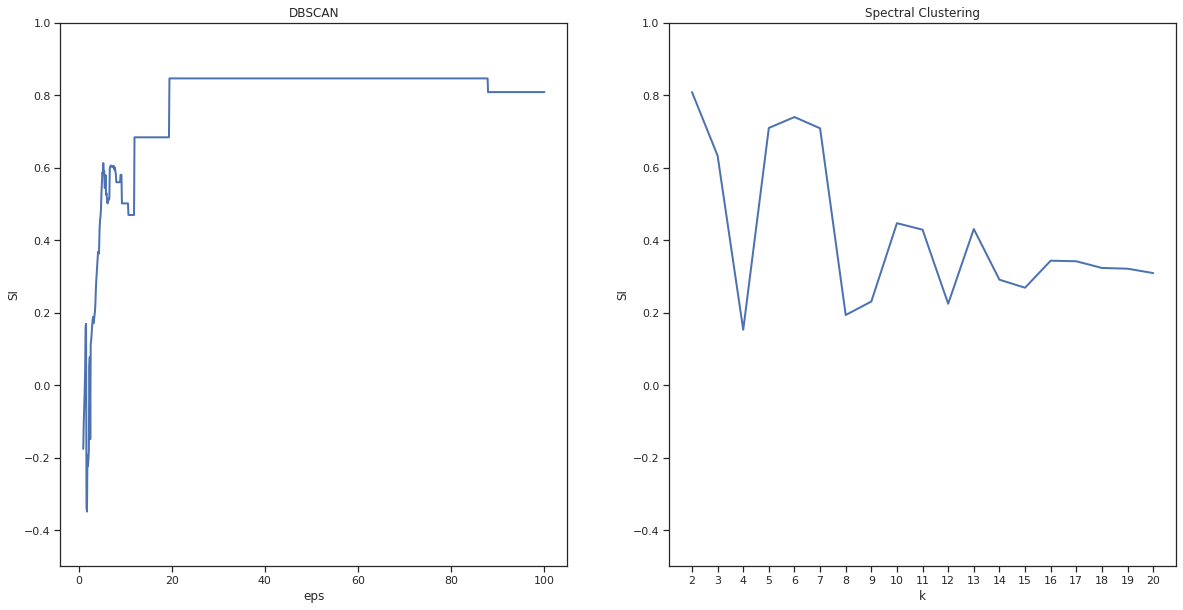

In [9]:
plt.rcParams['figure.figsize'] = [20,10]

fig, ax =plt.subplots(1,2)
sns.set(style="ticks", rc={"lines.linewidth": 2})

a1=sns.lineplot(data=result_SC,x='k',y='SI', ax=ax[1],).set_title('Spectral Clustering')
a1.axes.set_ylim(-0.5,1)
plt.xticks(result_SC.k)
a2=sns.lineplot(data=result_DB,x='eps',y='SI', ax=ax[0]).set_title('DBSCAN')
a2.axes.set_ylim(-0.5,1)
fig.show()

Wynik lepszy uzyskał DBSCAN dodatkowo uzyskał stale dobry wynik dla większych epsilonów. Podczas gdy Spectral Clustering uzyskał wynik zbliżony tylko w peaku przy 6 klastrach. W dalszej części przeanalizuje konkretne podziały (warto dodać, że oczekiwane 4 klastry uzyskały drugą najlepszą wartość miary).
# Indeks Calińskiego-Harabasza

/home/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


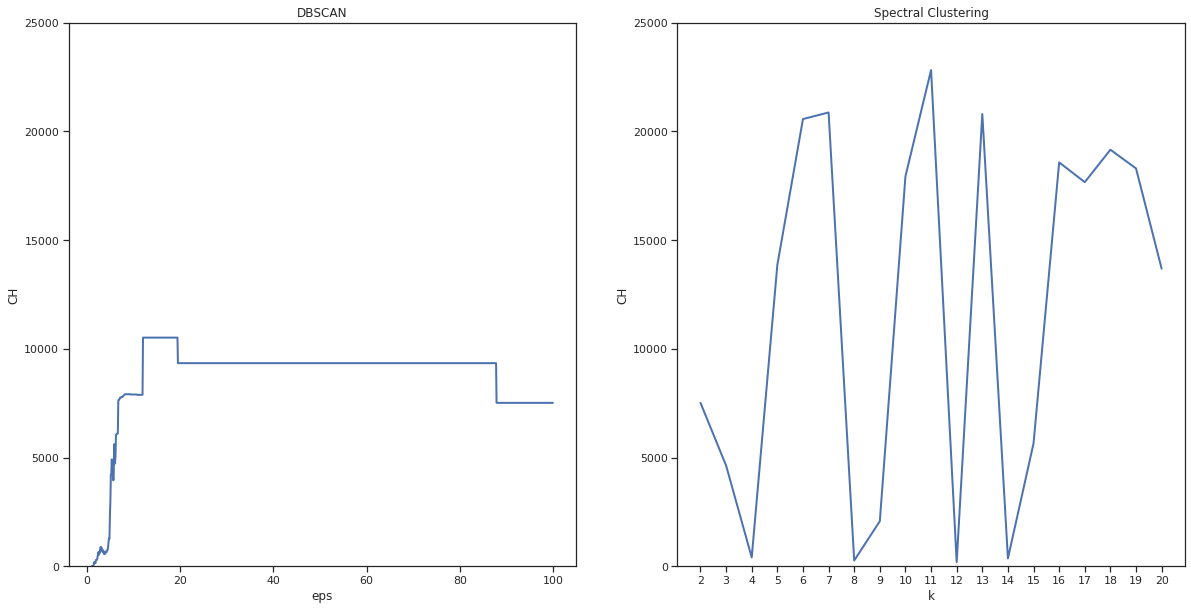

In [12]:
plt.rcParams['figure.figsize'] = [20,10]

fig, ax =plt.subplots(1,2)
sns.set(style="ticks", rc={"lines.linewidth": 2})

a1=sns.lineplot(data=result_SC,x='k',y='CH', ax=ax[1],).set_title('Spectral Clustering')
a1.axes.set_ylim(0,25000)
plt.xticks(result_SC.k)
a2=sns.lineplot(data=result_DB,x='eps',y='CH', ax=ax[0]).set_title('DBSCAN')
a2.axes.set_ylim(0,25000)
fig.show()

W tym wypadku zdecydowanie wyższe wyniki uzyskał algorytm Spectral Clustering chociaż podobnie jak poprzednio był bardzo niestabilny co ciekawe uzyskał bardzo niski wynik dla oczekiwanych 4 klastrów.
# Indeks Daviesa–Bouldina

AxesSubplot(0.547727,0.125;0.352273x0.755)


/home/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


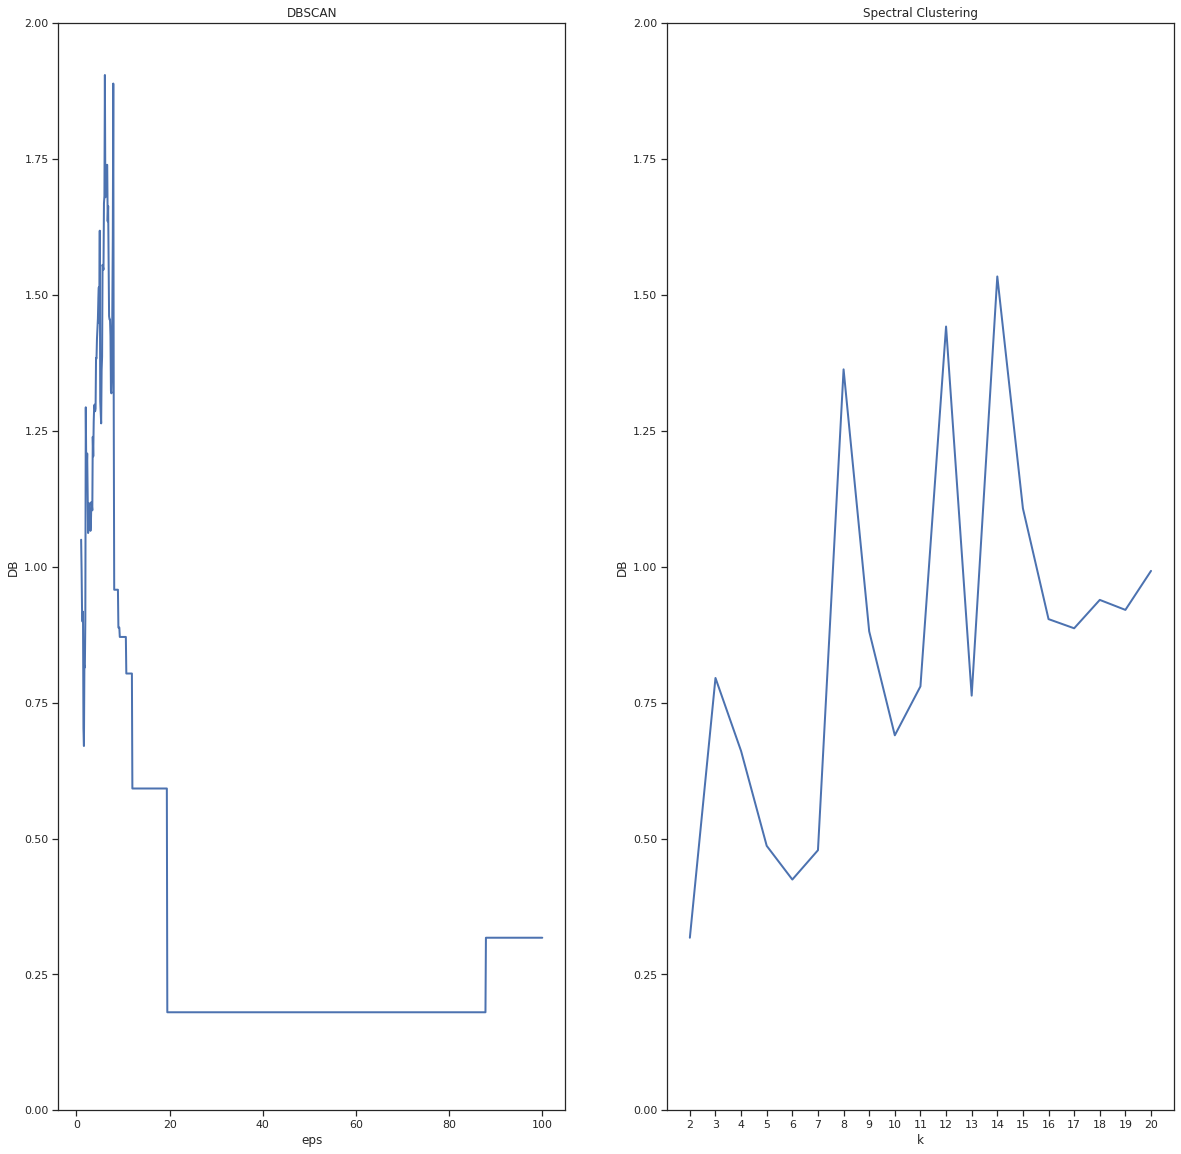

In [28]:
fig, ax =plt.subplots(1,2)
sns.set(style="ticks", rc={"lines.linewidth": 2})

a1=sns.lineplot(data=result_SC,x='k',y='DB', ax=ax[1],).set_title('Spectral Clustering')
a1.axes.set_ylim(0,2)
plt.xticks(result_SC.k)
a2=sns.lineplot(data=result_DB,x='eps',y='DB', ax=ax[0]).set_title('DBSCAN')
a2.axes.set_ylim(0,2)
fig.show()

W trzeciej  metryce wygrywa algorytm DBSCAN ponownie zachowująć stabilność na dość sporym obrzasze parametru eps. Tym razem najlepszy wynik dla algorytmu SC przypadł ponownie na 6 klastrów.
# Porównanie klasteryzacji
Wybiorę parametr etc=60 ponieważ we wszystkich wypadkach osiągał najlepsze lub prawie najlepsze wyniki. Dla algorytnmu Spectral Clustering wybiorę 6 klastrów ponieważ 2 z 3 metryk wskazują na tę liczbę jednoznacznie, a w 3 uzyskała prawie najlepszy wynik.


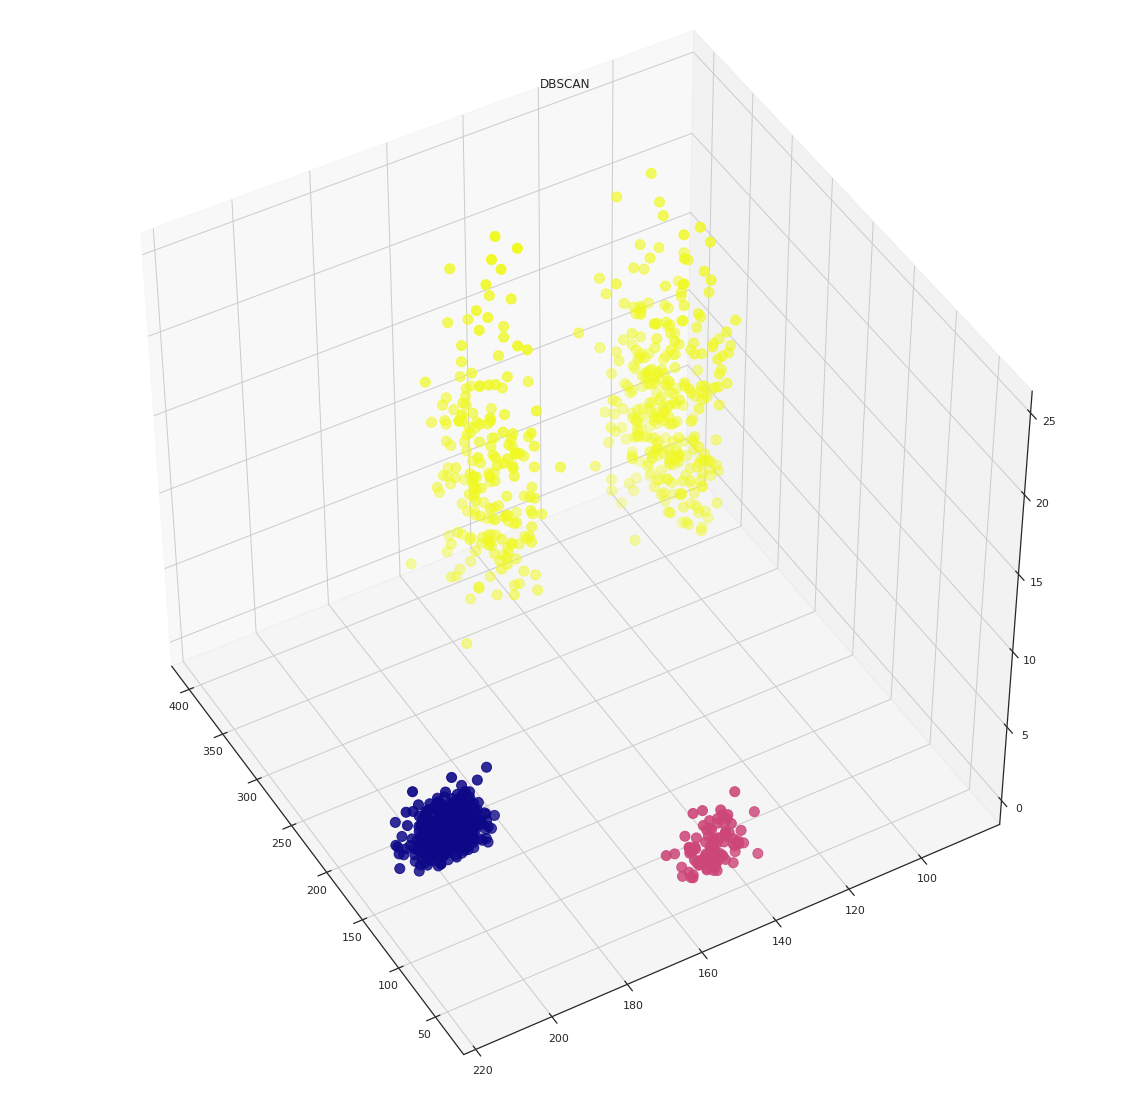

In [76]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['X3'],c=DBSCAN(eps=60).fit(data).labels_,cmap="plasma",s=100)
ax.view_init(45, 150)
ax.axes.set_title('DBSCAN')
plt.show()
  

Podział dość sensowny, ale początkowe spostrzeżenie  o 4 klastrach okazało się niepoprawne.

/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


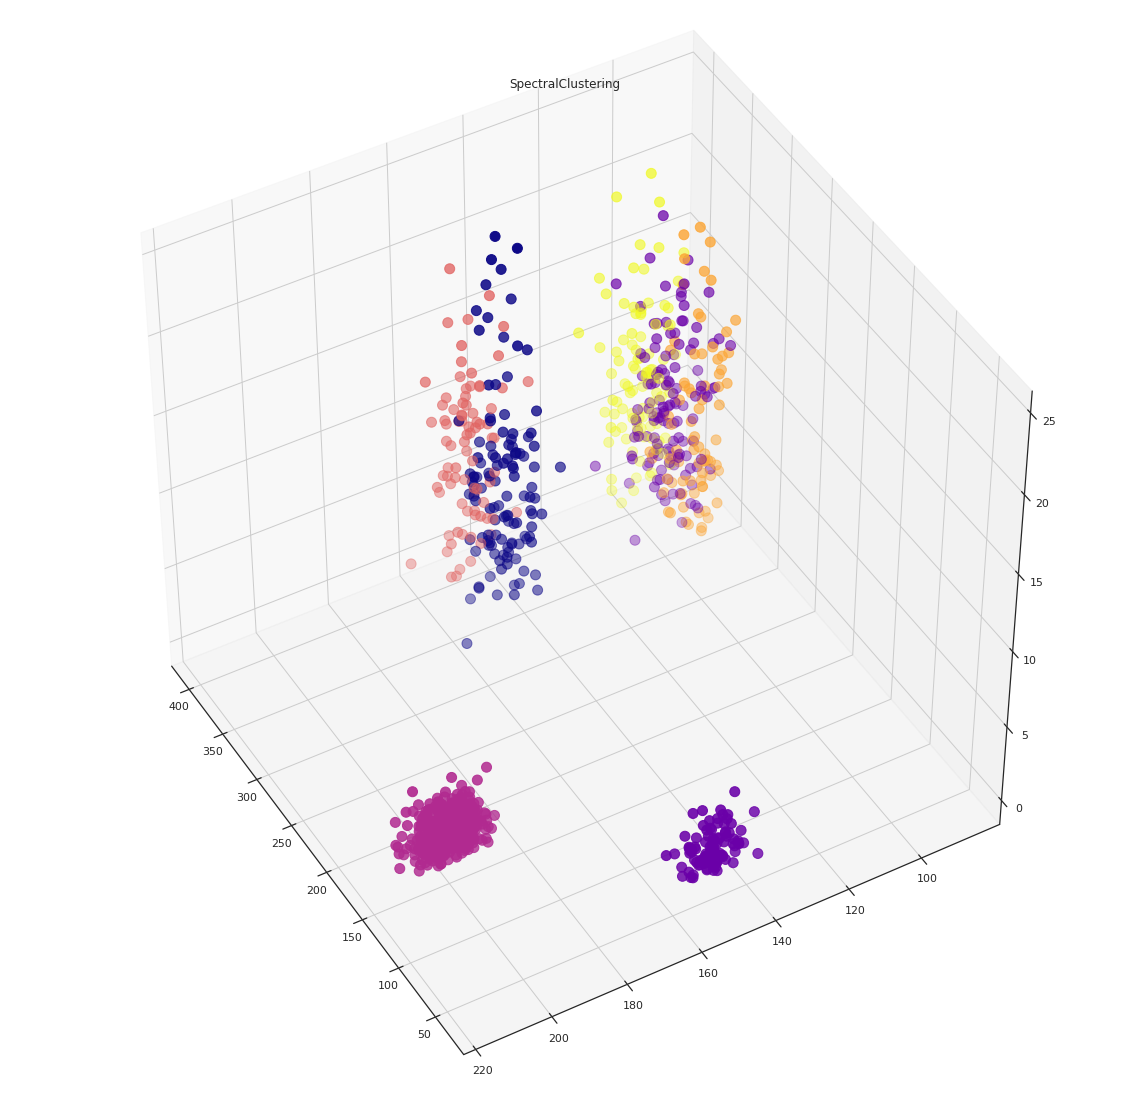

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['X3'],c=SpectralClustering(n_clusters=6,affinity='nearest_neighbors').fit(data).labels_,cmap="plasma",s=100)
ax.view_init(45, 150)
ax.axes.set_title('SpectralClustering')
plt.show()

  

Podział wydaje się dziwny, a klastry ustawione w nienaturalny sposób. Sprawdżmy wynik dla 3 klastrów jak przy DBSCAN.

/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


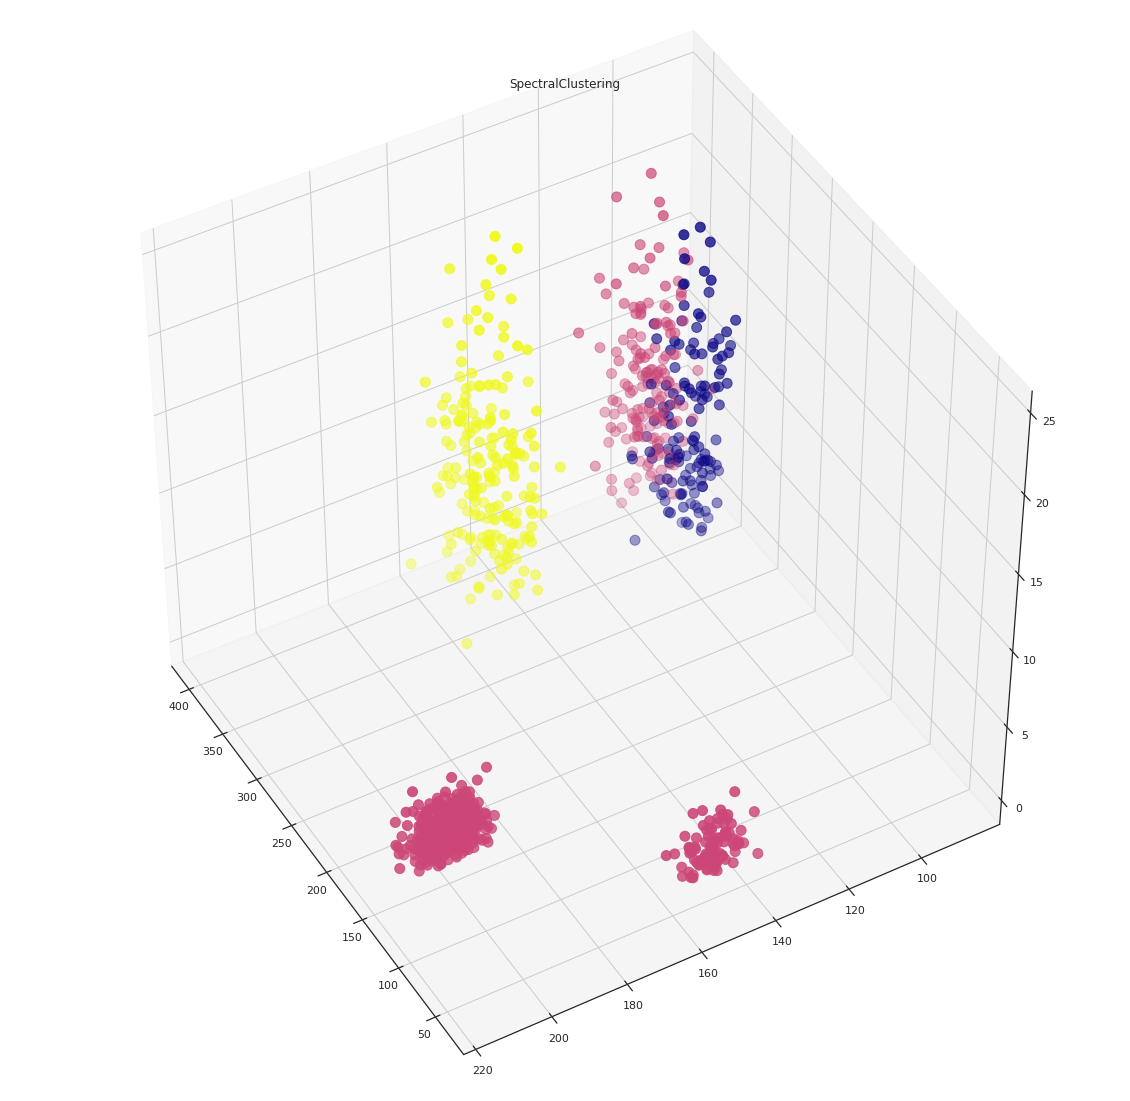

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['X3'],c=SpectralClustering(n_clusters=3,affinity='nearest_neighbors').fit(data).labels_,cmap="plasma",s=100)
ax.view_init(45, 150)
ax.axes.set_title('SpectralClustering')
plt.show()


Podział również niezbyt sensowny.

# Podsumowanie 

Kierując się wyłącznie matematyką w dwóch z trzech metryk lepszy wynik uzyskał DBSCAN, ale różnica w jedynej w której okazał się gorszy była znaczna.
Był on również znacznie bardziej stabilny od Spectral Clustering, a także znacząco szybszy. Przewagą DBSCAN jest 
też fakt nie wybierania ilosci klastrów, a jedynie parametru eps, którego szeroki zakres może odpowiadać oczekiwanej ilości. Myślę, że powyższe argumenty i wyniki jasno wskazują na DBSCAN jako lepszy z dwóch porównywanych algorytmów.